# Introduction to Data Analysis with Pandas

[Pandas](https://pandas.pydata.org/) is a library for data analysis, manipulation, and visualization. The basic object of the defined by this module is the [DataFrame](https://pandas.pydata.org/docs/reference/frame.html).  This is a dataset used in this notebook can be obtained from Kaggle on the [classification of stars](https://www.kaggle.com/brsdincer/star-type-classification).  We load the data from a CSV file into a Pandas DataFrame and demonstrate some basic functionality of the module.

You can think of **data frames** as tables basically, where each row is an data entry and each of the columns is a property of that entry. In our case, each entry is gonna be a star and the columns some of its properties. We could also use each row to store the properties of some system at different time-points, eg. the concentration of different proteins over time in a cell, in this case each row would be a time-point and each column would be the different proteins. 

As opposed to numpy arrays, Pandas data frames allow to work with the data by using labels —eg. 'temperature'— rather than having to remember the index numbers associated to the temperature data.

Another great aspect of Pandas data frames is that we can mix types of data, eg. numerical variables like the mass of object —eg. 21.2 mg— and categorical data like a cell type —eg. 'cortical neuron'—.

In the field of data science the columns of dataset are often referred as 'feature vectors'. If you encounter that term, simply replace it in your mind by 'column'.

### Data description

Each row represent a star.

Feature vectors:

- Temperature -- The surface temperature of the star

- Luminosity -- Relative luminosity: how bright it is

- Size -- Relative radius: how big it is

- AM -- [Absolute magnitude](https://en.wikipedia.org/wiki/Absolute_magnitude): another measure of the star luminosity

- Color -- General Color of Spectrum

- Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

- Spectral_Class -- O,B,A,F,G,K,M / SMASS - [Stellar classification](https://en.wikipedia.org/wiki/Stellar_classification)


### Loading data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

/var/folders/5r/37slq4k14kb2dywqvcdlbwdc0000gn/T/ipykernel_7547/2359310441.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18, 12)
plt.rcParams["figure.figsize"] = (16,10)

The DataFrame can be created from a csv file using the read_csv method. 
If you are working on Colab, you will need to upload the data.

Notice that in this case we are loading data from a .csv file, but with Pandas we can load pretty much any kind of data format, including matlab data files.

In [3]:
df = pd.read_csv('Stars.csv')

The head method displays the first few rows of data together with the column headers

In [4]:
df.head()

,Temperature,Luminosity,Size,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Red Dwarf


Specific columns of the DataFrame can be accessed by specifying the column name between square brackets:

In [5]:
stars_colors = df['Color'] # notice the columns names are case sensitive, ie. 'color' != 'Color'
print(stars_colors)

0        Red
1        Red
2        Red
3        Red
4        Red
       ...  
235     Blue
236     Blue
237    White
238    White
239     Blue
Name: Color, Length: 240, dtype: object


The individual entries of the DataFrame (ie. rows) can be accessed using the `iloc` method, specifying the index:

In [6]:
print(df.iloc[[0]]) # where 0 is the index of the first entry

   Temperature  Luminosity  Size    A_M Color Spectral_Class       Type
0         3068      0.0024  0.17  16.12   Red              M  Red Dwarf


The describe method will give basic summary statistics for the numerical variables of each column

In [7]:
summary = df.describe()
print(summary)

        Temperature     Luminosity         Size         A_M
count    240.000000     240.000000   240.000000  240.000000
mean   10497.462500  107188.361635   237.157781    4.382396
std     9552.425037  179432.244940   517.155763   10.532512
min     1939.000000       0.000080     0.008400  -11.920000
25%     3344.250000       0.000865     0.102750   -6.232500
50%     5776.000000       0.070500     0.762500    8.313000
75%    15055.500000  198050.000000    42.750000   13.697500
max    40000.000000  849420.000000  1948.500000   20.060000


We can also call methods of the individual columns to get summary information.
The column objects (such as df['Temperature']) are called Series

In [8]:
print("Mean Temperature is:",df['Temperature'].mean())
print("Max Temperature is:",df['Temperature'].max())

Mean Temperature is: 10497.4625
Max Temperature is: 40000


### Visualize single variable data

The Series objects (columns) have plot methods as well as the numerical summary methods.

<Axes: >

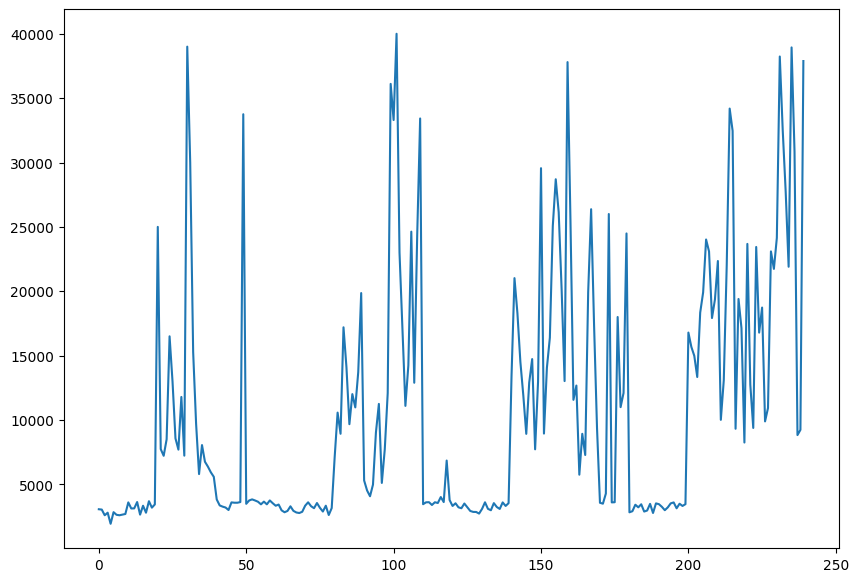

In [9]:
df['Temperature'].plot.line(figsize=(10,7))

Pandas is interoperable with matplotlib and numpy, so for instance if we want to add labels to the figure above we simply add the following lines from matplotlib:

Text(0, 0.5, 'Star Temperature')

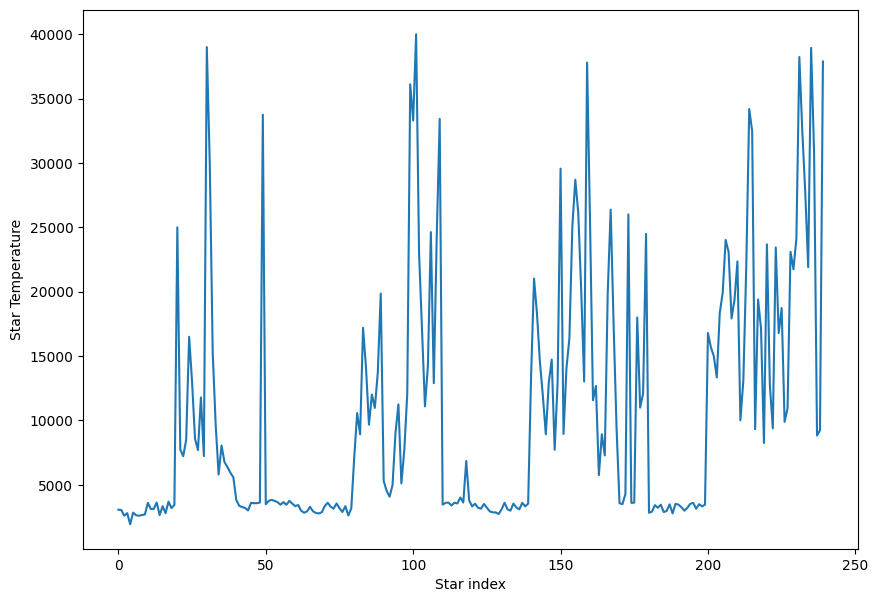

In [10]:
df['Temperature'].plot.line(figsize=(10,7));
plt.xlabel('Star index')
plt.ylabel('Star Temperature')

The above is equivalent to:

<Axes: xlabel='Star index', ylabel='Temperature'>

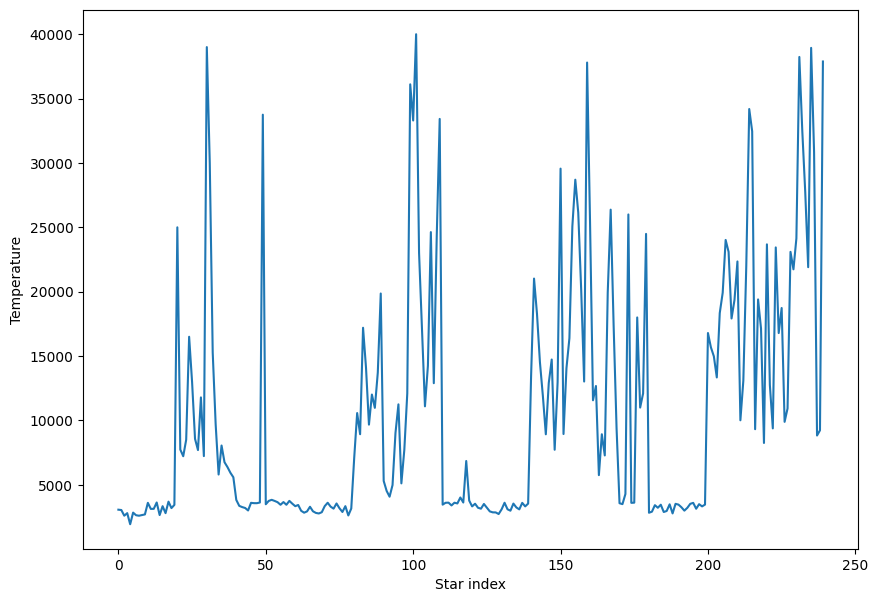

In [11]:
df['Temperature'].plot.line(xlabel = 'Star index', ylabel='Temperature', figsize=(10,7))

#### Exercise

- Check Pandas [series.plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) and plot the temperature of the different stars as an histogram.
- By observing at the histogram, what's the most common temperature for stars?

In [12]:
## Your code here

### Scatter plots for multiple variables

A typical problem in any field is to understand how some properties relate others, eg. are two properties independent or correlated to each other? We can quickly explore the correlations in some data frame by using scatter plots and plotting some properties against others:

<Axes: xlabel='Temperature', ylabel='Luminosity'>

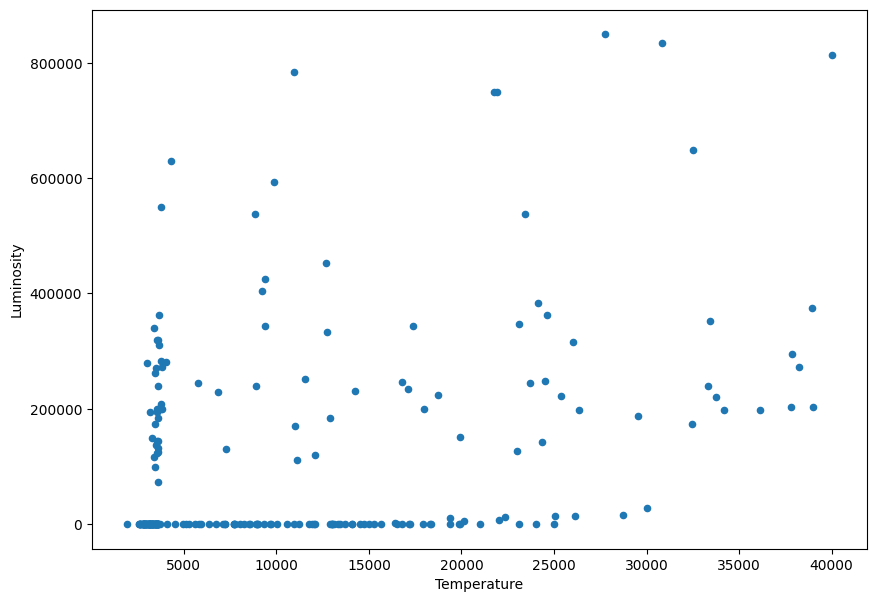

In [13]:
df.plot.scatter('Temperature','Luminosity', figsize=(10,7))

We notice that the values of the Luminosity go from very small to very big values:

In [14]:
print(df['Luminosity'].min())
print(df['Luminosity'].max())

8e-05
849420.0


In this situations where we are plotting over a very long range of values, it's useful to change the scale to a logarithmic one:

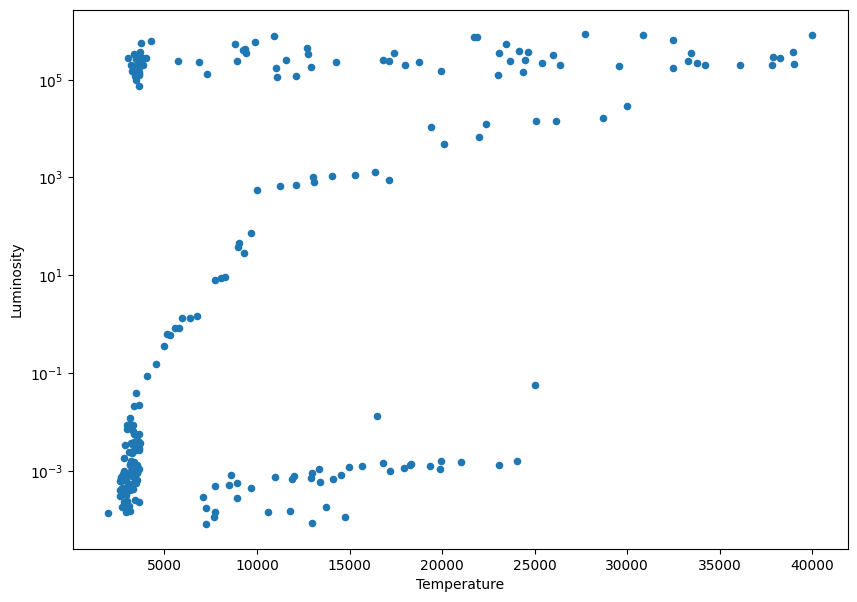

In [15]:
ax = df.plot.scatter('Temperature','Luminosity', figsize=(10,7))
plt.yscale('log')

#### Exercise
- Make scatter plots of the different star features.
- Two of the feature columns in the data are monotonically correlated, find them. # Hint: you may need to use log scale to better see a linear correlation.

In [16]:
## Your code here

### Sort the data

We can sort the data using the `sort_values` method:

In [17]:
sorted_data = df.sort_values('Temperature',ascending=True)
sorted_data.head()

,Temperature,Luminosity,Size,A_M,Color,Spectral_Class,Type
4,1939,0.000138,0.103,20.06,Red,M,Red Dwarf
2,2600,0.000300,0.102,18.70,Red,M,Red Dwarf
7,2600,0.000400,0.096,17.40,Red,M,Red Dwarf
78,2621,0.000600,0.098,12.81,Red,M,Brown Dwarf
6,2637,0.000730,0.127,17.22,Red,M,Red Dwarf


### Describe categorical data

We can describe the categorical variable 'Color'.  In this case we get different results than when we used describe on a numerical value.

In [18]:
print(df['Color'].describe())

count     240
unique     17
top       Red
freq      112
Name: Color, dtype: object


We look at the unique values of 'Color'

In [19]:
print(df['Color'].unique())

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']


#### Exercise
- Create a histogram to visualize how many stars of each color there are.

In [20]:
## Your code here

### Filter and split data 

Sometimes we want to select sections of the data based on their values, we can easily do so with pandas. Let's find the set of stars whose temperature is higher than 10000 K. We first create a *boolean array* for the condition, that is, a vector which associate a true or false value to each star with regard to the filtering condition, in our case case, it will give a true value if the start temperature is higher than 10000 K and false otherwise:

In [21]:
hot_stars_boolean_vector = df['Temperature'] > 10000
print(hot_stars_boolean_vector)

0      False
1      False
2      False
3      False
4      False
       ...  
235     True
236     True
237    False
238    False
239     True
Name: Temperature, Length: 240, dtype: bool


In python a true value is represented with the number 1 and a false value with the number zero, that means that if we want to know hot many stars are hotter than 10000 K we can simply sum up our boolean vector:

In [22]:
number_of_hot_stars = np.sum(hot_stars_boolean_vector)
print(f'There are {number_of_hot_stars} hot stars in the dataset')

There are 90 hot stars in the dataset


It works the same for categorical data. Let's find out the number of super giants stars:

In [23]:
super_giants_boolean_vector = df['Type'] == 'Super Giants' 
nb_super_giants = np.sum(super_giants_boolean_vector)
print(f'There are {nb_super_giants} super giants stars in the dataset')

There are 40 super giants stars in the dataset


If we are only interested in exploring the properties of super giants stars (because our dataset is too big or because white dwarfs are lame), we can get select only the data of the super giants stars using the boolean vector we just created:

In [24]:
df_with_only_super_giants = df[super_giants_boolean_vector]
print(df_with_only_super_giants)

     Temperature  Luminosity  Size    A_M Color Spectral_Class          Type
40          3826    200000.0  19.0 -6.930   Red              M  Super Giants
41          3365    340000.0  23.0 -6.200   Red              M  Super Giants
42          3270    150000.0  88.0 -6.020   Red              M  Super Giants
43          3200    195000.0  17.0 -7.220   Red              M  Super Giants
44          3008    280000.0  25.0 -6.000   Red              M  Super Giants
45          3600    320000.0  29.0 -6.600   Red              M  Super Giants
46          3575    123000.0  45.0 -6.780   Red              M  Super Giants
47          3574    200000.0  89.0 -5.240   Red              M  Super Giants
48          3625    184000.0  84.0 -6.740   Red              M  Super Giants
49         33750    220000.0  26.0 -6.100  Blue              B  Super Giants
100        33300    240000.0  12.0 -6.500  Blue              B  Super Giants
101        40000    813000.0  14.0 -6.230  Blue              O  Super Giants

Wait, wait. What if we want we want to filter for two conditions, say, we want to keep only the very hoy super giant stars? Low and behold, we simply need to apply both conditions:

In [25]:
hot_super_giants = df[super_giants_boolean_vector & hot_stars_boolean_vector]
print(f"There are {hot_super_giants.shape[0]} super hot giants")
print(hot_super_giants)

There are 25 super hot giants
     Temperature  Luminosity  Size    A_M Color Spectral_Class          Type
49         33750    220000.0  26.0 -6.100  Blue              B  Super Giants
100        33300    240000.0  12.0 -6.500  Blue              B  Super Giants
101        40000    813000.0  14.0 -6.230  Blue              O  Super Giants
102        23000    127000.0  36.0 -5.760  Blue              O  Super Giants
103        17120    235000.0  83.0 -6.890  Blue              O  Super Giants
104        11096    112000.0  12.0 -5.910  Blue              O  Super Giants
105        14245    231000.0  42.0 -6.120  Blue              O  Super Giants
106        24630    363000.0  63.0 -5.830  Blue              O  Super Giants
107        12893    184000.0  36.0 -6.340  Blue              O  Super Giants
108        24345    142000.0  57.0 -6.240  Blue              O  Super Giants
109        33421    352000.0  67.0 -5.790  Blue              O  Super Giants
160        25390    223000.0  57.0 -5.920  Blu

We can apply conditions directly on the data frame:

In [26]:
hot_super_giants = df[(df['Type'] == 'Super Giants') & (df['Temperature'] > 10000)]
print(f"\nThere are {hot_super_giants.shape[0]} super hot giants\n")
print(hot_super_giants)


There are 25 super hot giants

     Temperature  Luminosity  Size    A_M Color Spectral_Class          Type
49         33750    220000.0  26.0 -6.100  Blue              B  Super Giants
100        33300    240000.0  12.0 -6.500  Blue              B  Super Giants
101        40000    813000.0  14.0 -6.230  Blue              O  Super Giants
102        23000    127000.0  36.0 -5.760  Blue              O  Super Giants
103        17120    235000.0  83.0 -6.890  Blue              O  Super Giants
104        11096    112000.0  12.0 -5.910  Blue              O  Super Giants
105        14245    231000.0  42.0 -6.120  Blue              O  Super Giants
106        24630    363000.0  63.0 -5.830  Blue              O  Super Giants
107        12893    184000.0  36.0 -6.340  Blue              O  Super Giants
108        24345    142000.0  57.0 -6.240  Blue              O  Super Giants
109        33421    352000.0  67.0 -5.790  Blue              O  Super Giants
160        25390    223000.0  57.0 -5.920  B

#### Exercise

  - Find how many 'White Dwarf' have a surface temperature between 5000 K and 10000 K
  - Find the mean surface temperature of the White Dwarfs
  - How many times bigger are Super Giants stars compared to White Dwarfs?
  - What's the variance in the size of Super Giant stars?

In [27]:
## Your code here

### Creating new data frames and adding new columns to data frames

We can create a new data frame from another one with only some of the original data frame columns. Let's create a new data frame with only the temperature and type columns:

In [28]:
new_df = df[['Temperature','Type']]
print(new_df.head()) # It's always good practice to print the head of the data frames to make sure we're doing things right

   Temperature       Type
0         3068  Red Dwarf
1         3042  Red Dwarf
2         2600  Red Dwarf
3         2800  Red Dwarf
4         1939  Red Dwarf


We may also want to add new columns to an existing data frame, for instance, if we incorporate new data from a different file or we calculate new quantities based on the previous data. Here we are adding a new column whose values are the inverse of the luminosity:

In [29]:
df['Inverse Luminosity'] = 1 / df['Luminosity']

#### Exercise
- Add a new feature vector to the new data frame with the volume of each star. # Hint: Notice the column 'Size' is the radius $R$ of each star and that the volume of a sphere is $\frac{4}{3} \pi R^{3}$
- (Bonus Exercise) Add a new feature vector to the new data frame with the mass of each star. # Hint: The mass $m$ of an object is equal to the product of the volume $V$ by its density $\rho$, that is,  $m = \rho V $. Notice that different types of stars have different densities so you'll have to use the filtering as we did above: $\rho_{Dwarfs} = 10^{5} g/cc$,  $\rho_{Giants} = 10^{-8} g/cc$,  $\rho_{Main\ sequence} = 1 g/cc$. *You are welcome to ignore the units, the goal is that you practice how to apply operations to a subset of data frame.*

In [30]:
## Your code here

### Box plot of numerical data sorted by category

Let's visualise what is the range of temperature of the different stars based on their temperature. To do so, we first select the features we want to visualise and then call a box plot:

<Axes: title={'center': 'Temperature'}, xlabel='[Type]'>

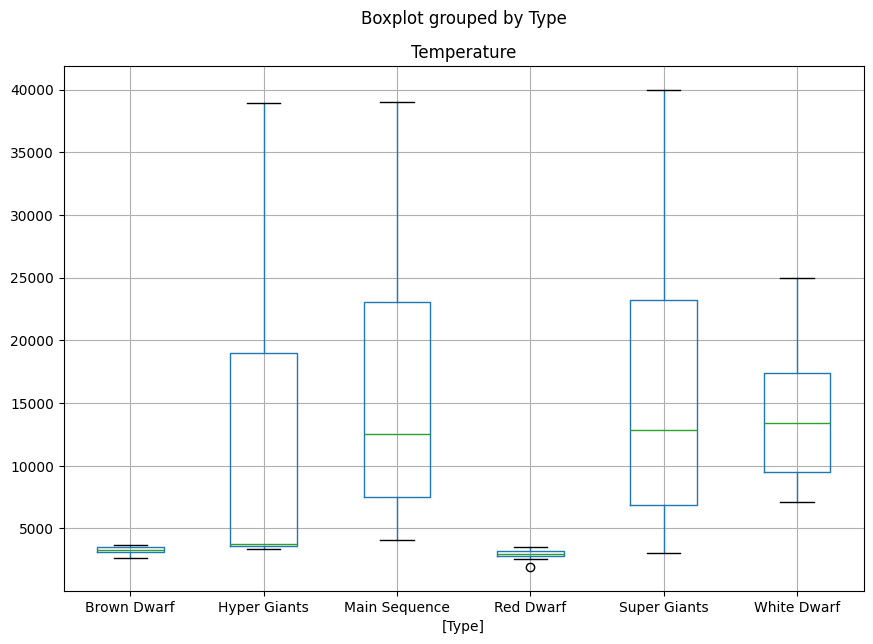

In [31]:
# The boxplot argument 'by' will split the plot over the variable given.
df[['Temperature','Type']].boxplot(by='Type', figsize=(10,7))

#### Exercise
- Make a similar figure as the above but displaying the range of volumes of the different start types

In [32]:
## Your code here

### Multi-plot figures

Now that we know how to filter data, let's make some figures. We construct a figure with 4 subplots:

<Axes: xlabel='Luminosity', ylabel='Size'>

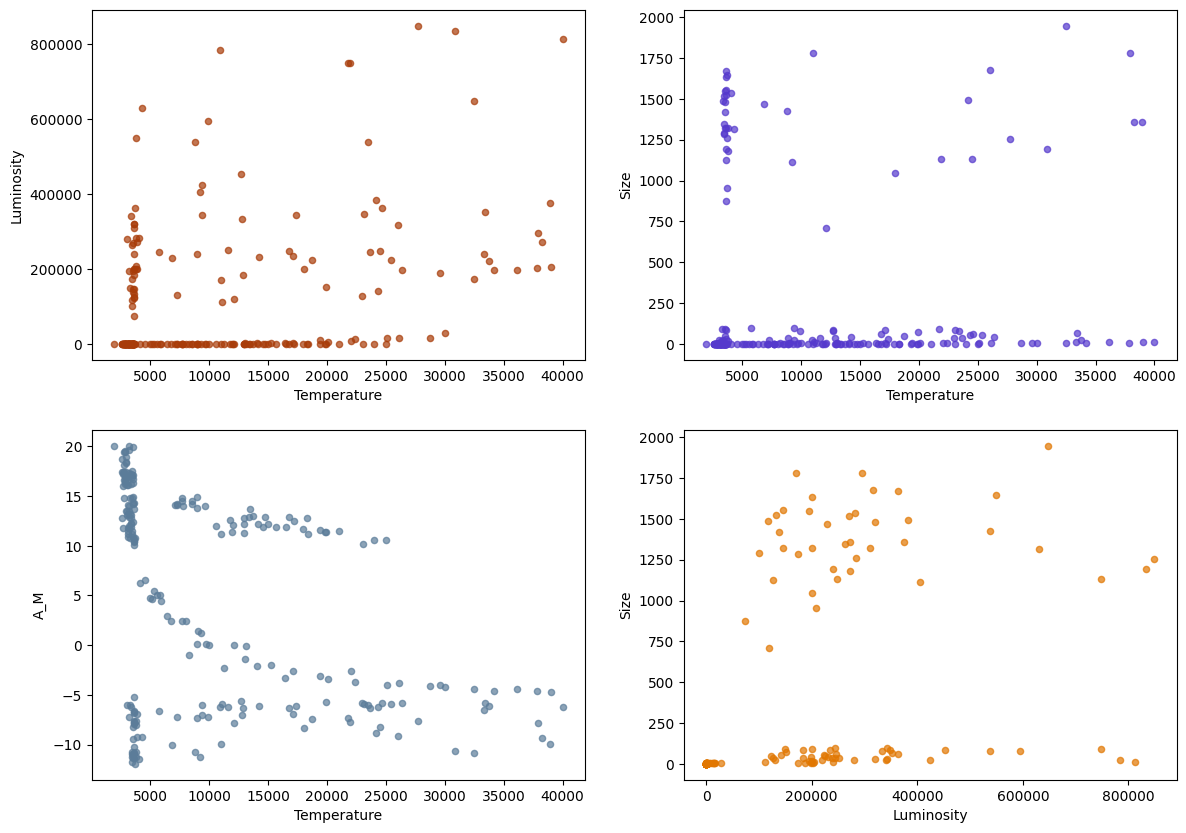

In [33]:
fig, ax = plt.subplots(2,2, figsize=(16, 12))
fig.set_figwidth(14)
fig.set_figheight(10)

## Plot the data.  ax[i,j] references the the Axes in row i column j
df.plot.scatter('Temperature','Luminosity',color='xkcd:rust',alpha=0.7,ax=ax[0,0])
df.plot.scatter('Temperature','Size',color='xkcd:blurple',alpha=0.7,ax=ax[0,1])
df.plot.scatter('Temperature','A_M',color='xkcd:slate blue',alpha=0.7,ax=ax[1,0])
df.plot.scatter('Luminosity','Size',color='xkcd:pumpkin',alpha=0.7,ax=ax[1,1])

We can see in the plot of $A_M$ versus Temperature, that there is a cluster of points ($A_M>9$,Temperature $>5000$) where the variables appear to have a strong correlation.  We might want to isolate and study that particular subset of the data by extracting it to a different DataFrame.

Let's isolate it into the variable `df_TAM` and plot it in a different color:

<Axes: xlabel='Temperature', ylabel='A_M'>

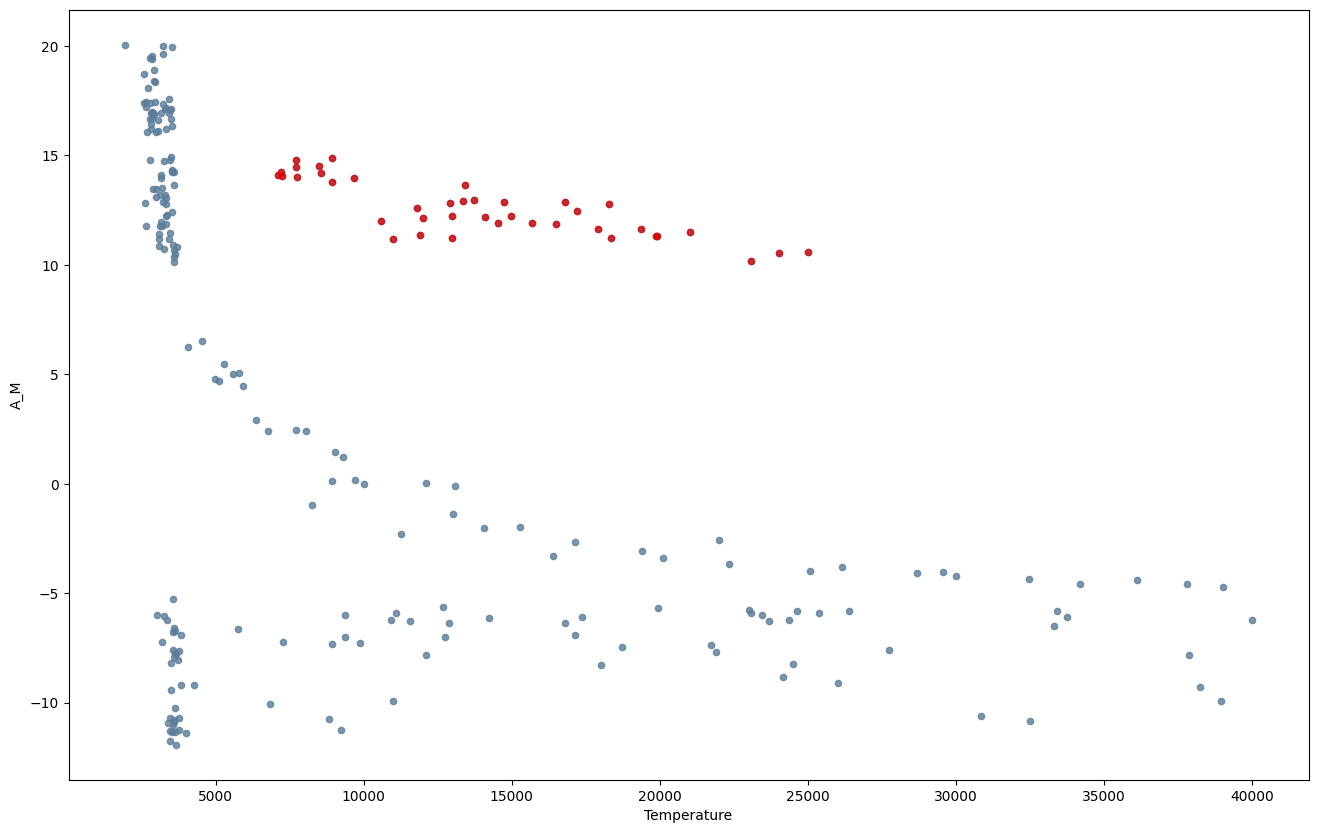

In [34]:
df_AM = df[df['A_M'] > 9]
df_TAM = df_AM[df_AM['Temperature'] > 5000]

## Plot the subset with the original
ax = df.plot.scatter('Temperature','A_M',color='xkcd:slate blue',alpha=0.8)
df_TAM.plot.scatter('Temperature','A_M',color='xkcd:red',ax=ax,alpha=0.7)

Let's print the statistics of this subset of data

In [35]:
print(df_TAM.describe())

        Temperature  Luminosity       Size        A_M  Inverse Luminosity
count     40.000000   40.000000  40.000000  40.000000           40.000000
mean   13931.450000    0.002434   0.010728  12.582500         2836.282072
std     4957.655189    0.008912   0.001725   1.278386         3270.623635
min     7100.000000    0.000080   0.008400  10.180000           17.857143
25%     9488.750000    0.000287   0.009305  11.595000          814.754098
50%    13380.000000    0.000760   0.010200  12.340000         1316.701317
75%    17380.000000    0.001227   0.012025  13.830000         3479.064039
max    25000.000000    0.056000   0.015000  14.870000        12500.000000


### Linear Regression

Let's finish this notebook by doing a liner regression on the data. 

A linear regression consist in a linear model than relates one variable to another variable. For instance, the temperature of a star to it luminosity. Linear models have the advantage of being easily interpreted —you can look at the model and figure out what's going on. On the other hand, they can not model non-linear relations, and God had the poor taste of making natural phenomena *very* non-linear. On the Machine learning notebooks, we'll learn how to train models that can deal with non-linear dependencies.


Since the data in the high absolute magnitude $A_M$, high-Temperature subset seem to be strongly correlated, we might fit linear model. To do this we will import the $\texttt{linregress}$ function from the $\texttt{stats}$ module in SciPy.

In [36]:
from scipy.stats import linregress

linear_model = linregress(df_TAM['Temperature'],df_TAM['A_M'])

Let's plot the regression line together with the data.

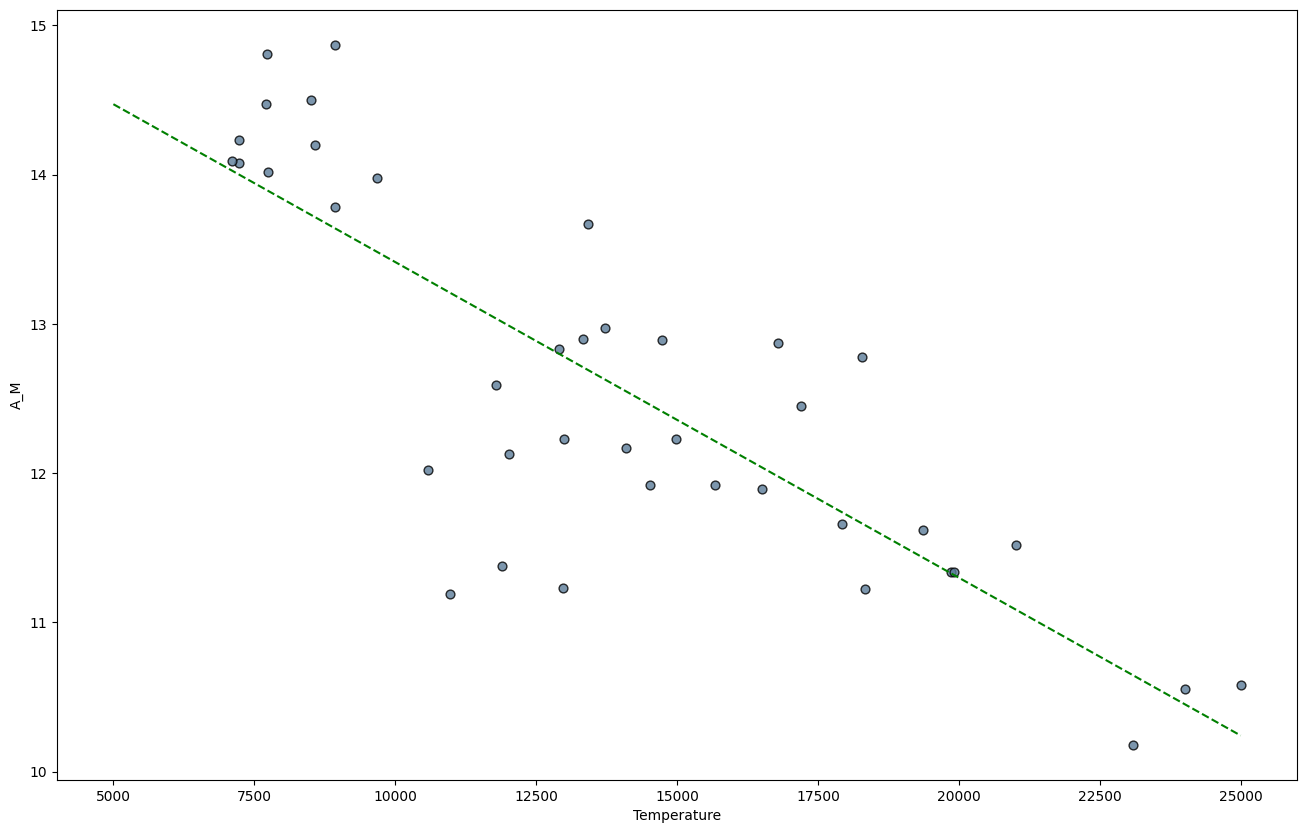

In [37]:
m = linear_model.slope
b = linear_model.intercept

x = np.linspace(5000,25000,5) # Range of temperatures
y = m*x + b
ax = df_TAM.plot.scatter('Temperature','A_M',color='xkcd:slate blue',s=40,edgecolor='black',alpha=0.8)
ax.plot(x,y,color='green',ls='dashed')

The model object that was produced by $\texttt{linregress}$ also contains the correlation coefficient, pvalue, and standard error.

In [38]:
print("Correlation coefficient:",linear_model.rvalue)
print("pvalue for null hypothesis of slope = 0:",linear_model.pvalue)
print("Standard error of the esimated gradient:",linear_model.stderr)

Correlation coefficient: -0.8201933172733418
pvalue for null hypothesis of slope = 0: 9.411965493687398e-11
Standard error of the esimated gradient: 2.3930706947460813e-05


### The Hertzsprung-Russell Diagram

The Hertzsprung-Russell Diagram is a scatter plot of stars showing the relationship between the stars' absolute magnitudes or luminosities versus their temperatures.

<p style="text-align:center;"><img src="https://upload.wikimedia.org/wikipedia/commons/7/78/H-R_diagram_-edited-3.gif" width="500"/>

Let's see if we can obtain something similar from our data:

#### Exercise
- Make a scatter plot from our star data. Plot each star type 'Super Giants', 'Main sequence' and 'White Dwarf' in different colours.
  
- Can you observe similar star clusters? # Hint: You might need to use logarithmic scales for the axis and reverse the direction of the temperature axis.

In [39]:
## Your code here